In [ ]:
# import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV




**Exploratory Data Analysis:**

In [ ]:
# Create the DataFrame
df=pd.read_csv('/content/loan_approval_data.csv')

In [ ]:
# Set display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [ ]:
# Display some data
df.sample(10)

loan_id  no_of_dependents education self_employed employment_type  \
1000     1001                 3       8th           Yes        Business   
823       824                 4      12th           Yes        Business   
3800     3801                 3      10th           Yes        Business   
811       812                 2       8th            No        Salaried   
509       510                 1      10th            No        Salaried   
3007     3008                 3      10th            No        Salaried   
4243     4244                 0       8th           Yes        Business   
2601     2602                 0  Graduate            No        Salaried   
733       734                 0      12th           Yes        Business   
1072     1073                 1       8th           Yes        Business   

      income_annum  loan_amount  loan_term  cibil_score  \
1000       2900000      7000000          4          806   
823        3800000     14300000          4          645   
3800       4600000     17900000          8          396   
811        9600000     28100000         20          763   
509        9900000     39500000         12          808   
3007       1100000      3100000         14          359   
4243       1600000      3400000          8          867   
2601       7000000     21700000         20          498   
733         500000      1200000         14          556   
1072       6200000     19500000         20          448   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
1000                   5700000                  5600000              5900000   
823                    1300000                  1100000             10900000   
3800                  10700000                  4000000             12300000   
811                   23000000                 11800000             27500000   
509                   11800000                  3700000             30200000   
3007                   1500000                  1000000              4000000   
4243                   -100000                  2700000              4300000   
2601                   6600000                  5500000             14700000   
733                     900000                        0              1800000   
1072                   3300000                  7100000             22400000   

      bank_asset_value loan_status  
1000           3000000    Approved  
823            4600000    Approved  
3800           2600000    Rejected  
811           10300000    Approved  
509           13500000    Approved  
3007           1000000    Rejected  
4243           1300000    Approved  
2601           3900000    Rejected  
733             500000    Approved  
1072           8000000    Rejected

In [ ]:
# Drop the load_id column
df=df.drop('loan_id', axis=1)

In [ ]:
# Summary Statistics
df.describe()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
count              4269          4269         4269       4269         4269   
mean                  2       5059124     15133450         11          600   
std                   2       2806840      9043363          6          172   
min                   0        200000       300000          2          300   
25%                   1       2700000      7700000          6          453   
50%                   3       5100000     14500000         10          600   
75%                   4       7500000     21500000         16          748   
max                   5       9900000     39500000         20          900   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count                      4269                     4269                 4269   
mean                    7472617                  4973155             15126306   
std                     6503637                  4388966              9103754   
min                     -100000                        0               300000   
25%                     2200000                  1300000              7500000   
50%                     5600000                  3700000             14600000   
75%                    11300000                  7600000             21700000   
max                    29100000                 19400000             39200000   

       bank_asset_value  
count              4269  
mean            4976692  
std             3250185  
min                   0  
25%             2300000  
50%             4600000  
75%             7100000  
max            14700000

In [ ]:
# Shape of the data
df.shape

(4269, 13)

In [ ]:
# Data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   employment_type           4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(9), object(4)
memory usage: 433.7+ KB


In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the columns
print("Numerical Columns:")
for col in numerical_columns:
    print(col)

print("\nCategorical Columns:")
for col in categorical_columns:
    print(col)

Numerical Columns:
no_of_dependents
income_annum
loan_amount
loan_term
cibil_score
residential_assets_value
commercial_assets_value
luxury_assets_value
bank_asset_value

Categorical Columns:
education
self_employed
employment_type
loan_status


In [ ]:
# Check for missing values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
employment_type             0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

**Observation:** There are no missing values in the dataset.

In [ ]:
# Check for duplicated values
df.duplicated().sum()

0

**Observation:** The dataset does not have any duplicated rows.

**Data Visualization:**

**Categorical Columns:**

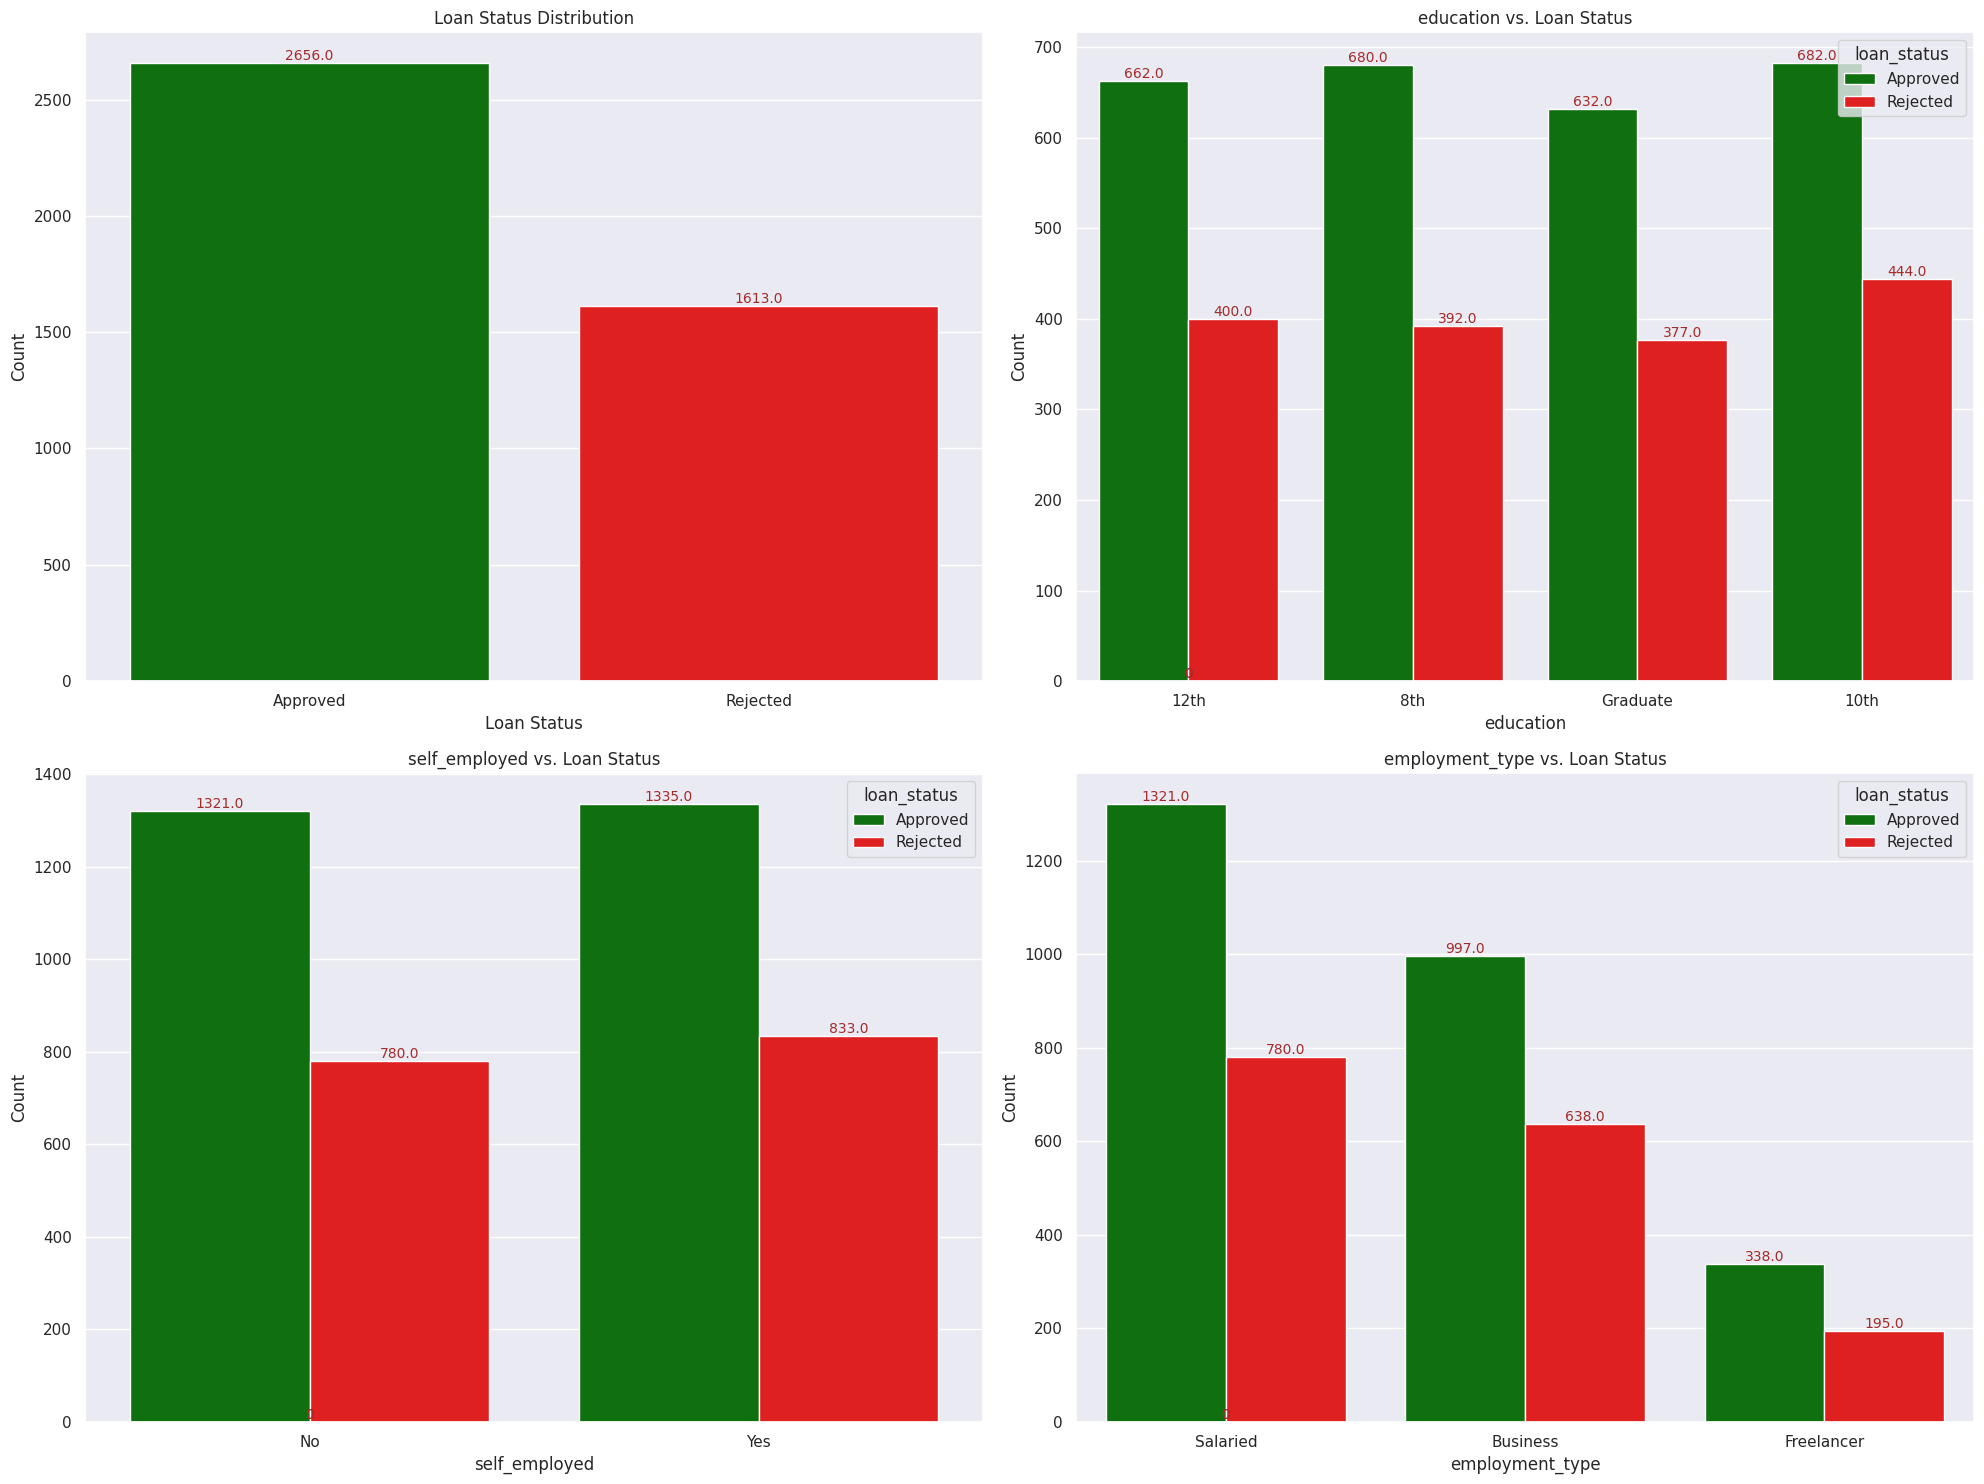

In [ ]:
# List of categorical columns
categorical_columns = ['education', 'self_employed', 'employment_type']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# Plot the bar plot for loan status
ax = sns.countplot(x='loan_status', data=df, hue='loan_status', palette={'Approved': 'green', 'Rejected': 'red'}, ax=axes[0])
axes[0].set_title('Loan Status Distribution')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')

# Annotate with actual values
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='brown', xytext=(0, 5),
                     textcoords='offset points')

# Plot bar plots for categorical columns vs. loan status
for i, col in enumerate(categorical_columns, 1):
    ax = sns.countplot(x=col, hue='loan_status', data=df, palette={'Approved': 'green', 'Rejected': 'red'}, ax=axes[i])
    axes[i].set_title(f'{col} vs. Loan Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Annotate with actual values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='brown', xytext=(0, 5),
                         textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


**Observations and Conclusions:**
* **Loan Status Distribution:** There are more approved loans than the rejected ones which clearly indicate an imbalance in the target class. This will affect the performance of the machine learning model as it will become biased towards the majority class. To address this we will use sampling techniques.

* **Education vs Loan Status:** The counts for approved and rejected loans are relatively balanced across different education levels, indicating that education is a consistent factor in load approval decisions.

* **Self employed vs Load Status:** The approval rates of self employed and non-self employed individuals are quite simiar suggesting a balanced distribution which might indicate that self-employment status is not a major factor in loan approval decisions.

* **Employment type vs Loan Status:** Salaried individuals have the highest no. of approved loans whereas Freelancers have the lowest no. of both approved and rejected loans. This indicates that salaried individuals might be viewed more favourably by lenders and fewer freelancers apply for the loans or they face more stringent approval criteria. Hence, employment type appears to significantly impact loan approval status.

In [ ]:
# Encode the target variable
df['loan_status_encoded'] = df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

**Numerical Columns:**

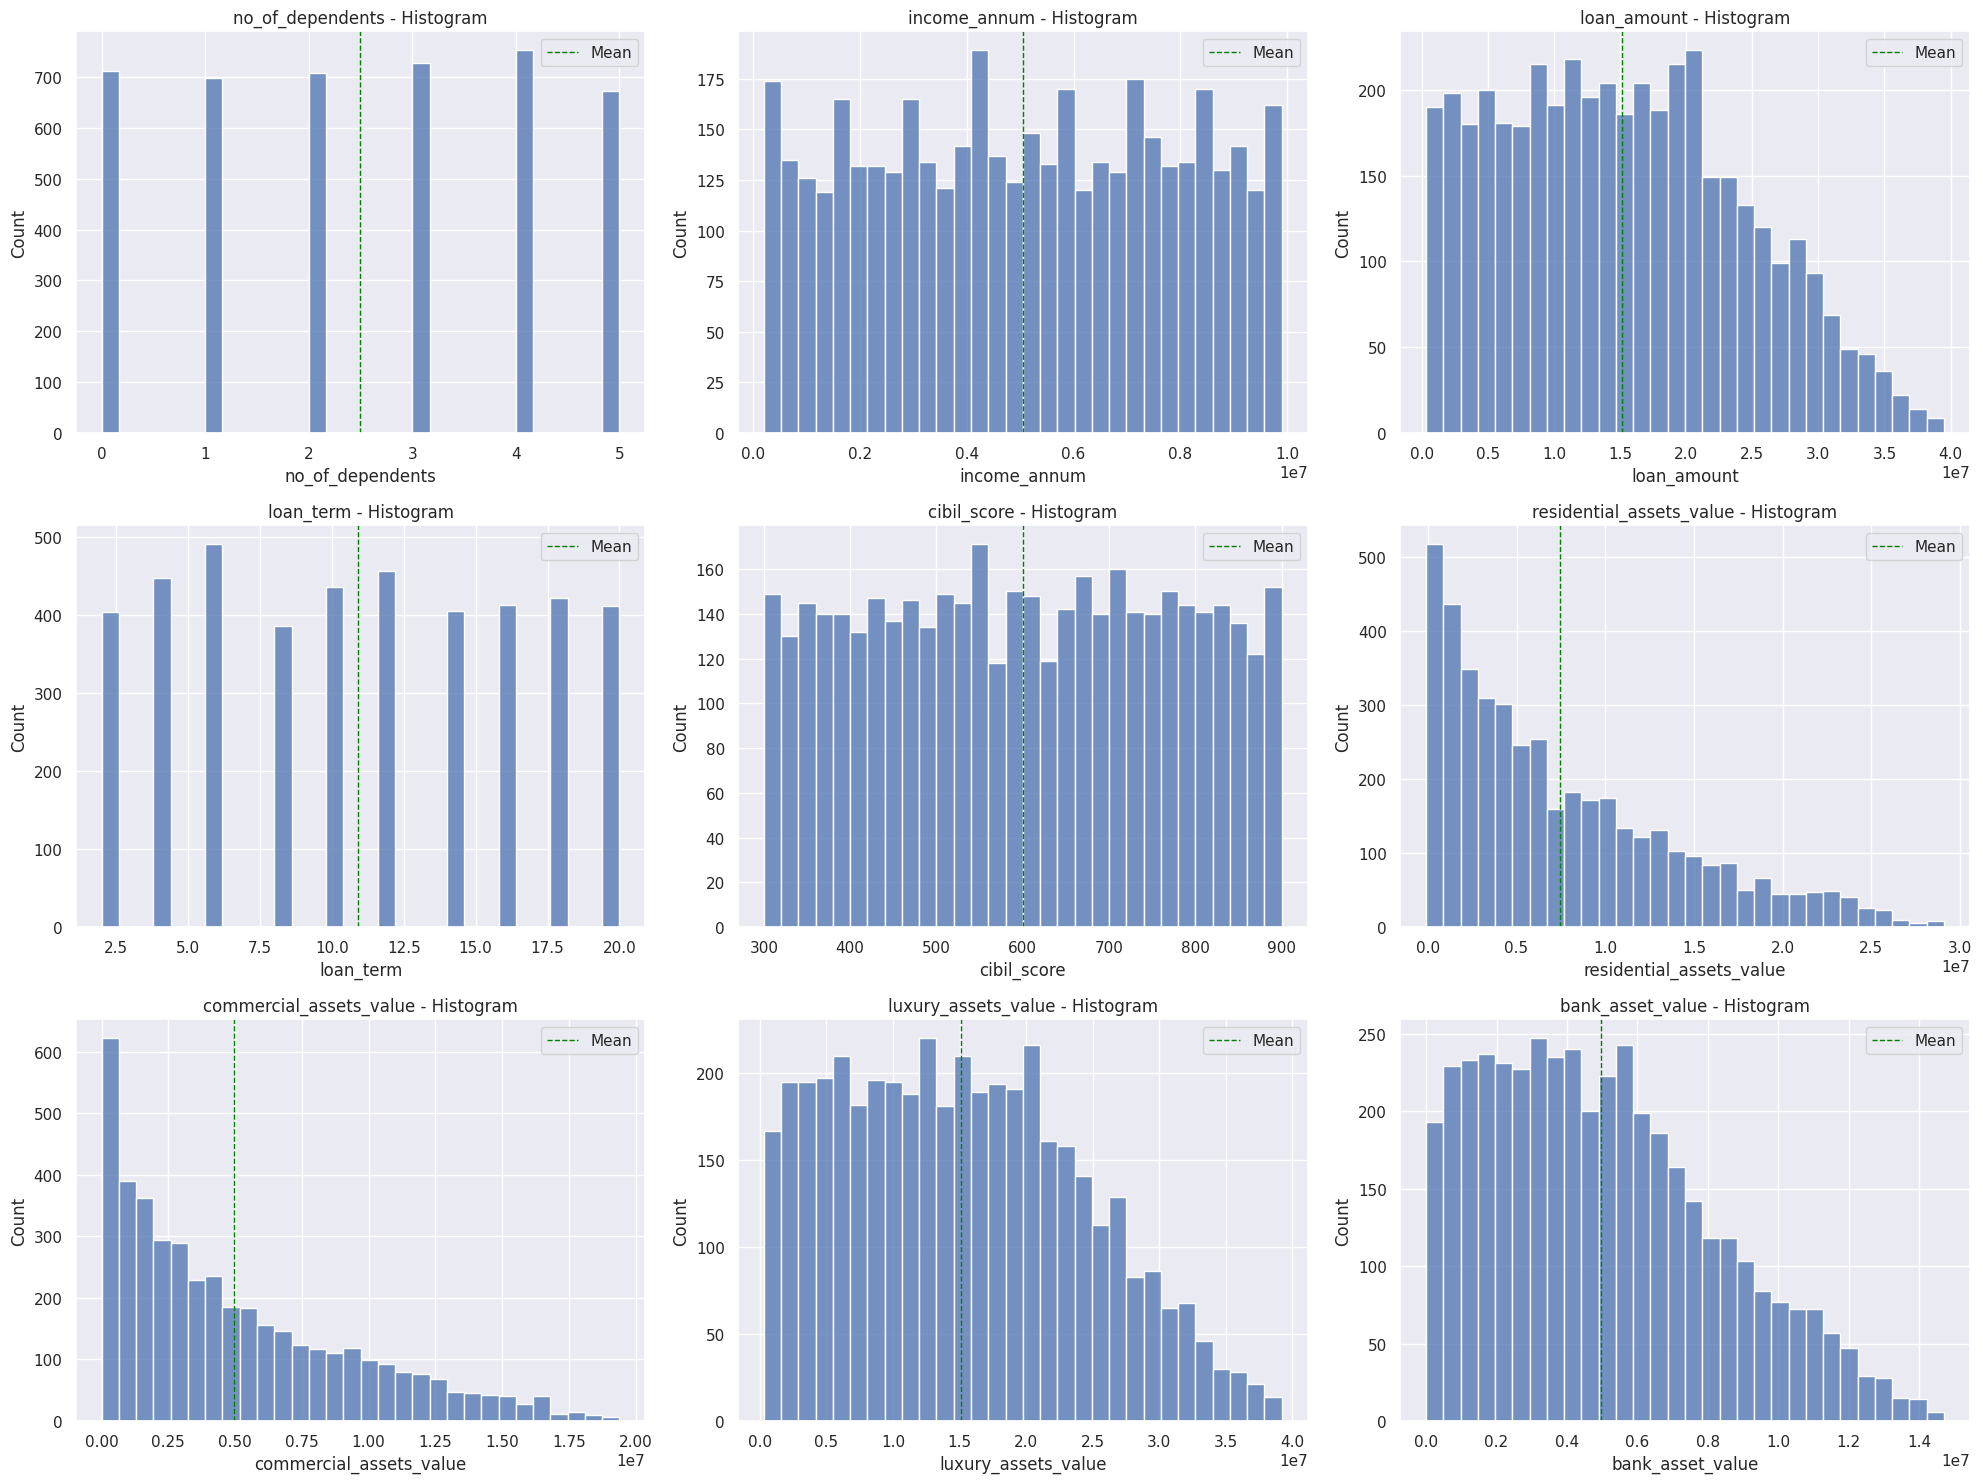

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot distribution for each numerical column with min, max, and mean
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=False, bins=30, ax=axes[i])
    axes[i].set_title(f'{col} - Histogram')
    axes[i].set_xlabel(col)

    # Add vertical lines for mean
    axes[i].axvline(df[col].mean(), color='green', linestyle='dashed', linewidth=1, label='Mean')



    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Observations and Conclusions:**
* **No. of dependents:** The distribution seems to be fairly uniform with slight peaks around 3-4 dependents. This suggests that most of the applicants have around 3-4 dependents.
* **Income_Annum:** The histogram appears fairly uniform across the range of values meaning the distribution is relatively flat. This suggests that income is spread across a wide range with a similar frequency of occurrence for many different values.
* **Loan Amount:** The distribution is right-skewed indicating that most of the loan amounts are on the lower side which suggests that smaller loan amounts are common among the applicants.
* **Loan Term:** There is a peak between 5- 7.5 years which shows most of the loans are taken for a medium- term duration.
* **CIBIL Score:** The distribution is somewhat uniform with slight peak around 500-600 range which suggest diverse range of credit scores among the applicants.
* **Residential Assets Value:** The distribution is right-skewed which suggests that most of the applicants have lower residential assets.
* **Commercial Assets Value:** The distribution is also right-skewed with most values on the lower side which suggests that commercial assets are not very high for most applicants.
* **Luxury Assets Value:** The distribution is right-skewed which suggests that majority of the applicants have modest luxury assets with only a few having high-value luxury assets.
* **Bank Assets Value:** The distribution is also right-skewed with most values on the lower side suggest that majority of the applicants have modest luxury assets with only a few having high-value luxury assets.

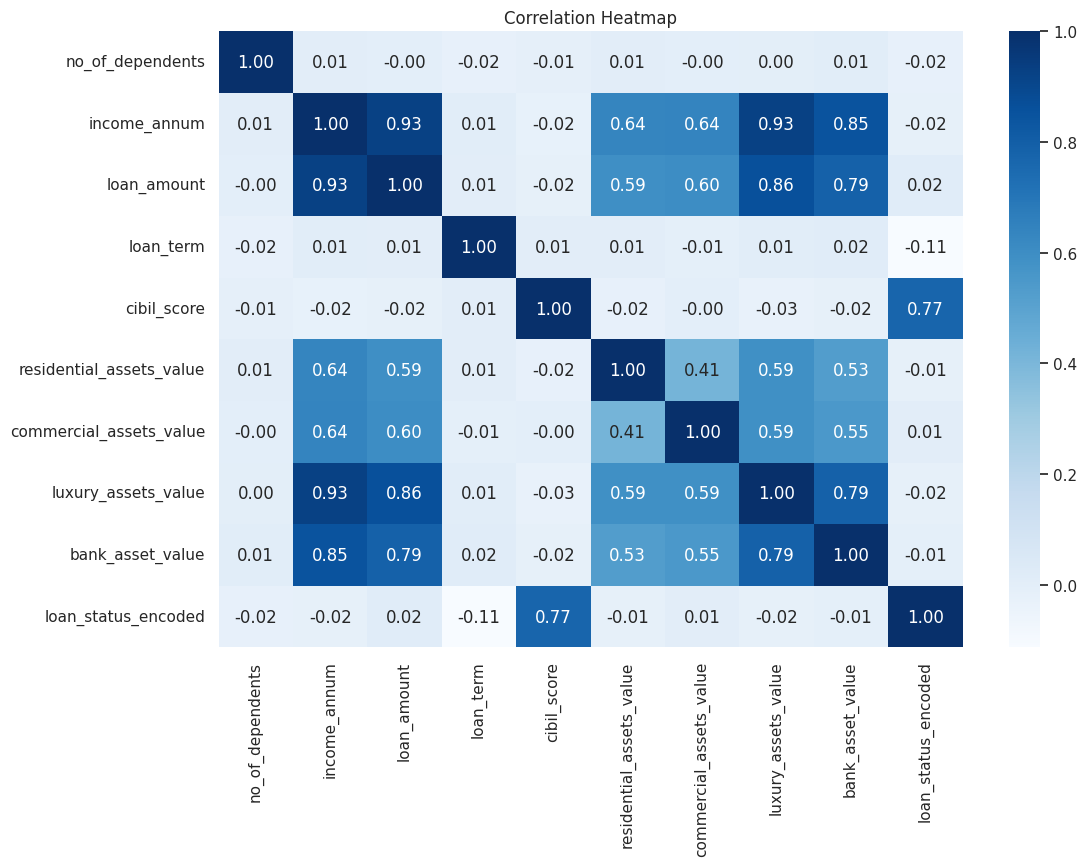

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data=df[[
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value', 'loan_status_encoded'
]].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Observations and conclusions:**
* Income and loan amount have strong positive correlation which suggests that higher income applicants tend to apply for larger loan amounts.
* Income annum and luxury assets value have a high positive correlation suggesting that as income increases, luxury status also tend to increase.
* Loan amount and luxury assets value have strong correlation suggesting individuals having higher loan amounts have higher luxury assets
* Bank asset value and income annum have strong correlation suggesting individuals with higher income also have higher bank assets.
* Loan amount and bank asset value  have moderate correlation which suggests that higher loan amounts are associated with higher bank assets.
* Individuals with high luxury assets also tend to have significant bank assets.
* Loan status and cibil score have strong positive correlation which clearly suggests that the loan status is highly dependent on the CIBIL Score. A higher CIBIL score is associated with a more positive loan status ( i.e. approval)
* Variables like no of dependents, loan term, residential assets value and commercial assets value show weak correlations with the other variables.
* Loan term has weak correlation with loan status as well indicating that loan duration does not play a significant role in loan outcomes.


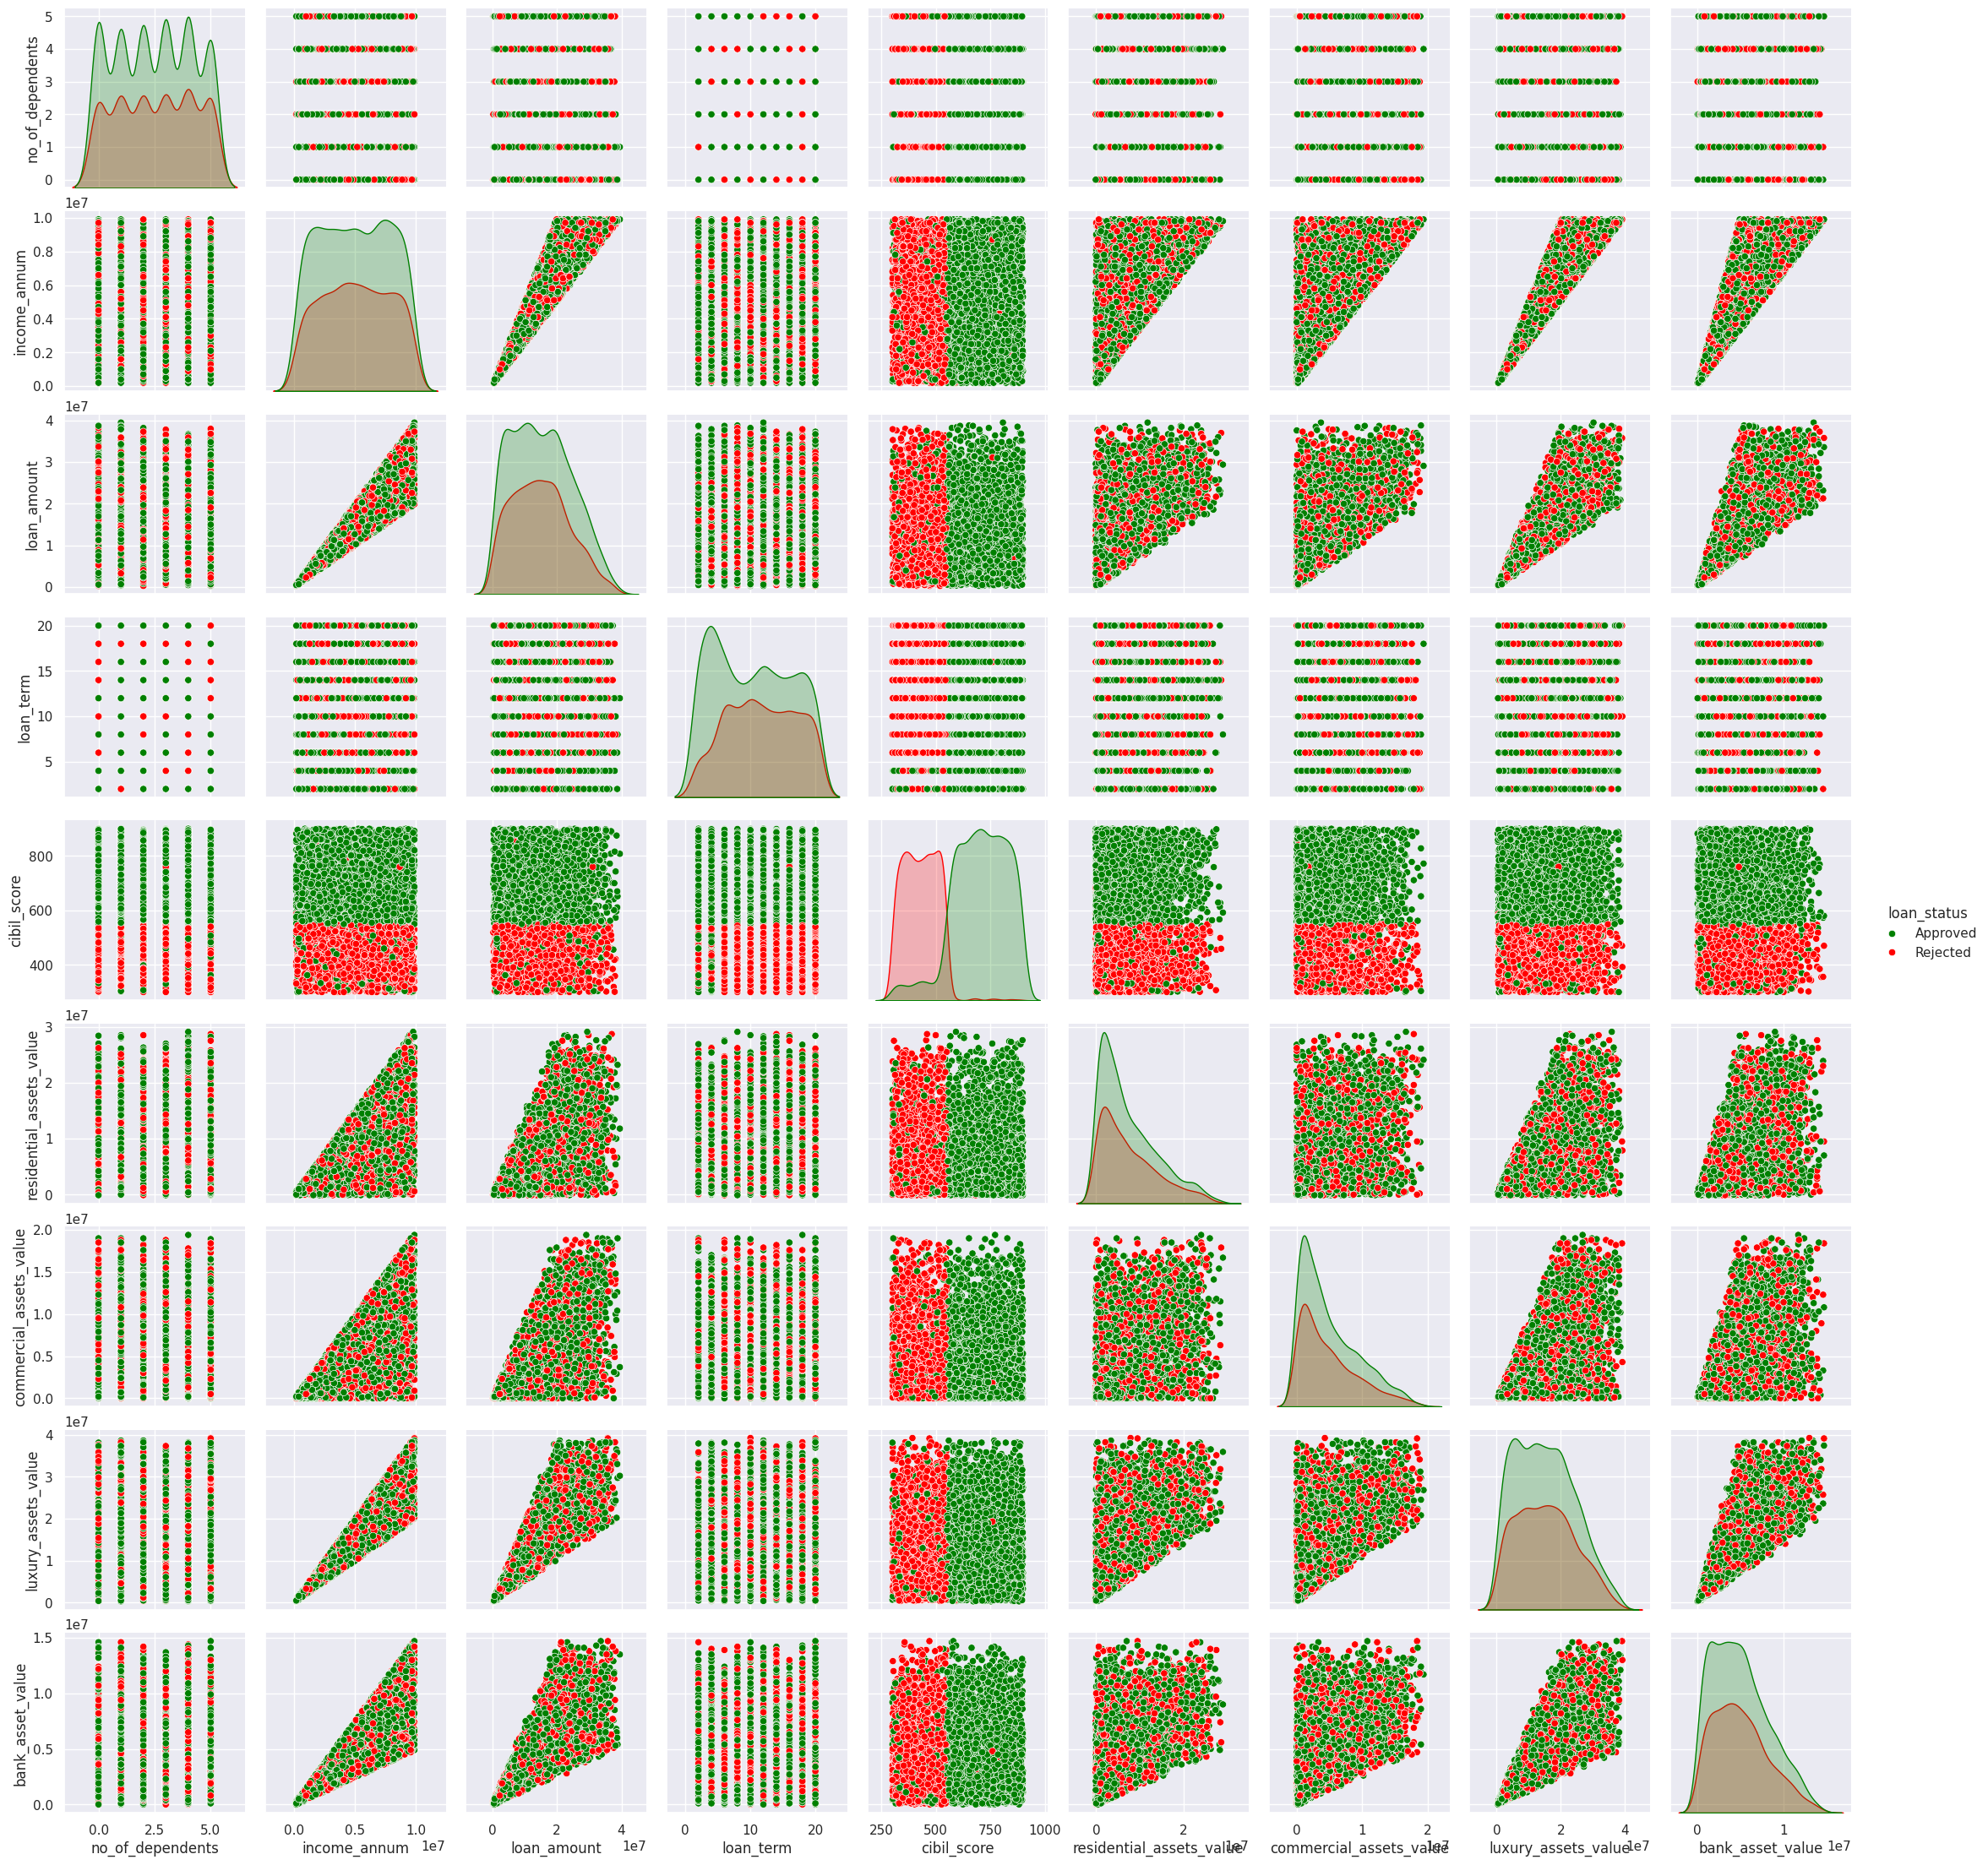

In [ ]:
# Pair Plot
sns.pairplot(data=df[[
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value', 'loan_status']], hue='loan_status',
     palette={'Approved': 'green', 'Rejected': 'red'})
plt.show()


**Key Observations:**
* CIBIL Score is the most important factor affecting loan status. We can see a clear distinction between the approvals (green) and rejections (red) based on CIBIL scores. Loan approvals generally have higher CIBIL scores while rejections have low CIBIL scores.
* Scatterplots of income annum vs other features show a moderate concentration of green points at higher income values, indicating higher income is associated with loan approvals.
* In the scatterplots of loan amount vs other variables, we see that both green and red points are evenly spread which indicate that loan amount is not a strong predictor for loan approval.
* Assets(Residential, Commercial, and Luxury) show no clear pattern in how they affect loan status as both green and red dots are spread across these varibles.
* Loan term shows a weak distinction between approved and rejected loans.
* There is no clear pattern in the number of dependents that affects the load status.

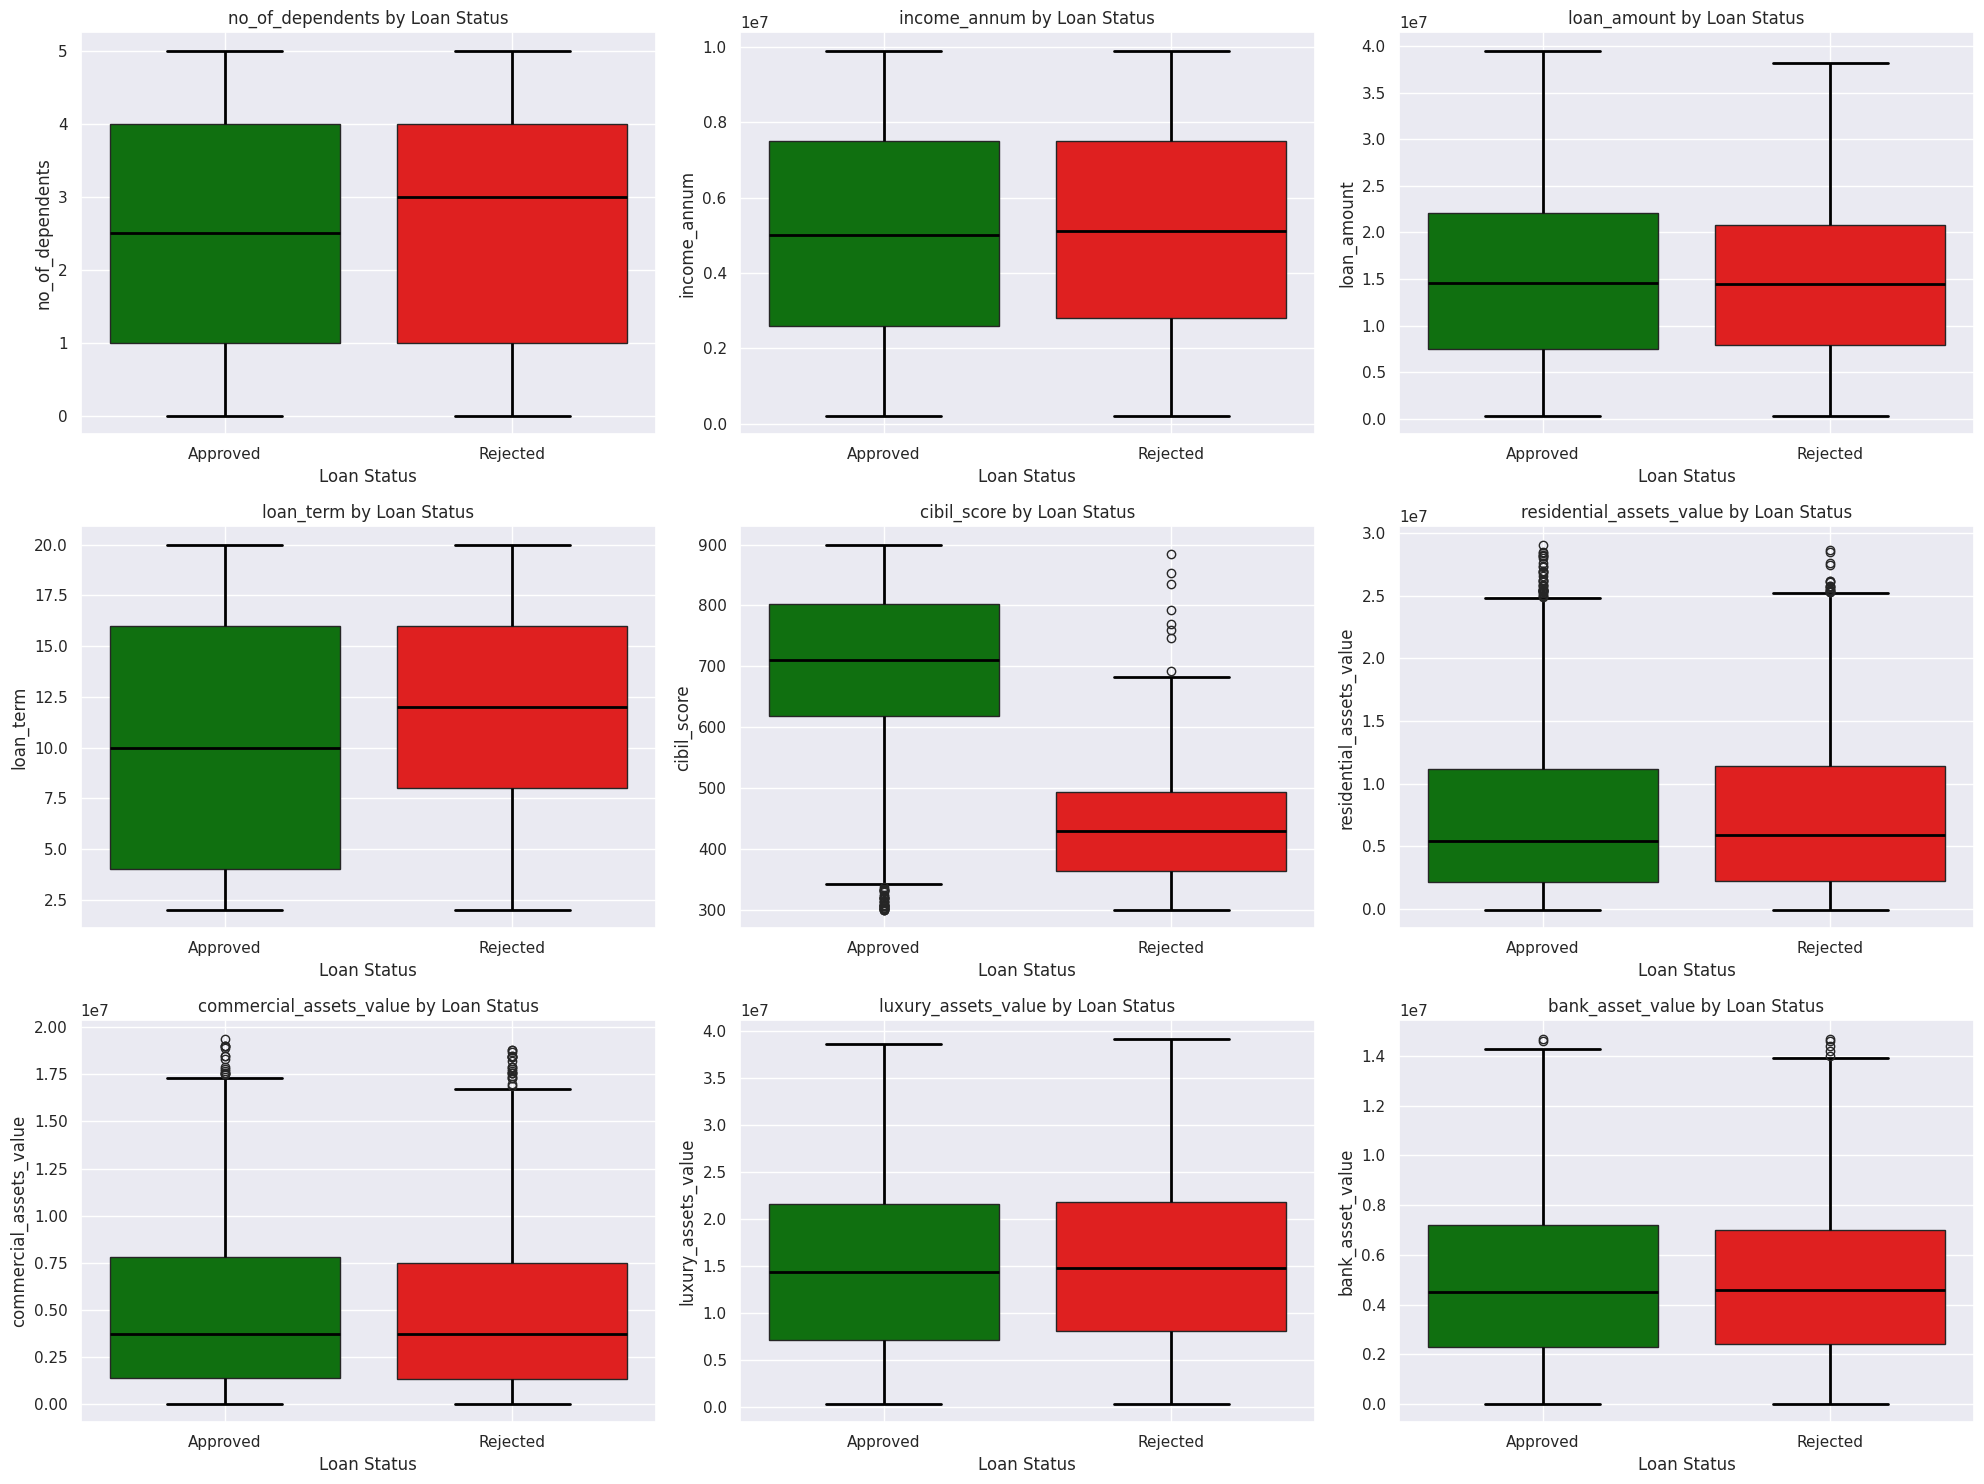

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Custom colors for the bar plots
palette = {'Approved': 'green', 'Rejected': 'red'}

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = sns.boxplot(data=df, x='loan_status', y=column, palette=palette, hue='loan_status', dodge=False, ax=axes[i])
    axes[i].set_title(f'{column} by Loan Status')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

    # Adding values on the box plot
    for patch in ax.artists:
        patch.set_edgecolor('black')
        patch.set_linewidth(2)

    for j, box in enumerate(ax.artists):
        box.set_facecolor(palette[df['loan_status'].unique()[j]])

    for line in ax.lines:
        line.set_color('black')
        line.set_linewidth(2)

# Adjust layout
plt.tight_layout()
plt.show()


**Key Observations:**
* CIBIL Score shows a clear significant difference between the two groups. Approved loans have a much higher median CIBIL score, and IQR is shifted towards the higher values compared to the rejected loans where the CIBIL score is relatively lower.
* Outliers are present in CIBIL score, Residential Asset value, Commerical Asset value and a few in case of Bank asset value

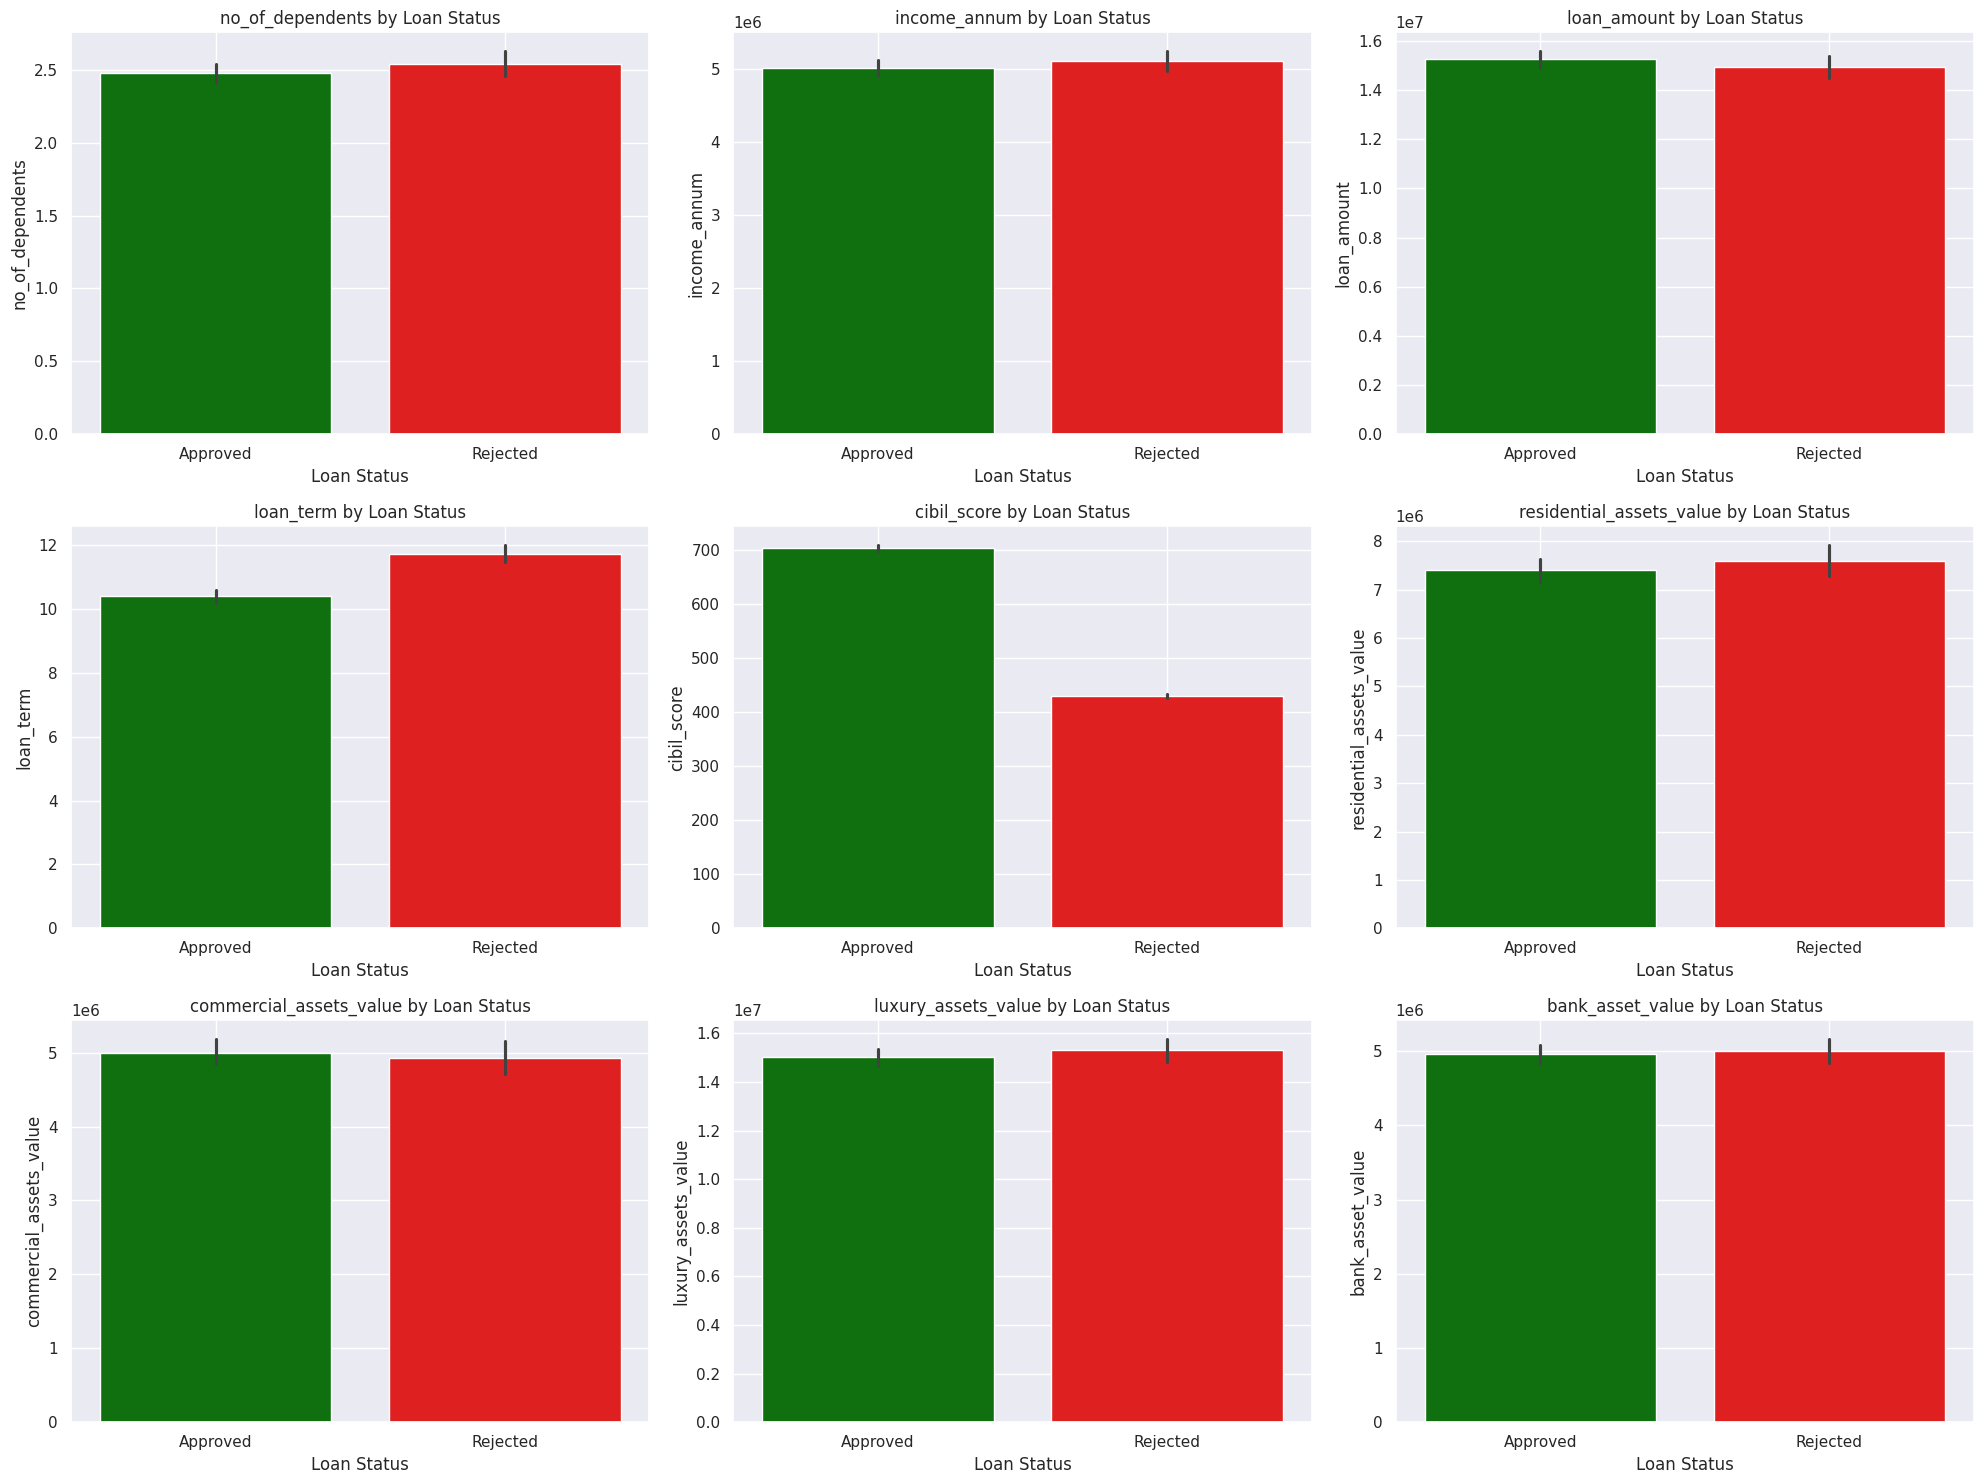

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Custom colors for the bar plots
palette = {'Approved': 'green', 'Rejected': 'red'}

# Plotting bar plots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = sns.barplot(data=df, x='loan_status', y=column, hue='loan_status', palette=palette, ax=axes[i], dodge=False)
    ax.set_title(f'{column} by Loan Status')
    ax.set_xlabel('Loan Status')
    ax.set_ylabel(column)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


**Key Observations:**
* We again find that there is a clear difference in the average CIBIL score between the approved and rejected loans. The mean is higher in case of approved loans.
* Other features do not provide a clear distinction for both groups.

**Data Pre-processing and Feature Engineering:**

In [ ]:
df.drop('loan_status_encoded', axis=1, inplace=True)
df.head(20)

no_of_dependents education self_employed employment_type  income_annum  \
0                  2      12th            No        Salaried       9600000   
1                  0      12th            No        Salaried       4100000   
2                  3       8th            No        Salaried       9100000   
3                  3       8th            No        Salaried       8200000   
4                  5  Graduate            No        Salaried       9800000   
5                  0  Graduate            No        Salaried       4800000   
6                  5       8th           Yes        Business       8700000   
7                  2      12th           Yes        Business       5700000   
8                  0  Graduate            No        Salaried        800000   
9                  5      12th            No        Salaried       1100000   
10                 4       8th           Yes        Business       2900000   
11                 2      10th            No        Salaried       6700000   
12                 3  Graduate           Yes      Freelancer       5000000   
13                 2       8th            No        Salaried       9100000   
14                 1      12th           Yes        Business       1900000   
15                 5       8th           Yes        Business       4700000   
16                 2       8th           Yes        Business        500000   
17                 4       8th           Yes        Business       2900000   
18                 2       8th           Yes        Business       2700000   
19                 5  Graduate            No        Salaried       6300000   

    loan_amount  loan_term  cibil_score  residential_assets_value  \
0      29900000         12          778                   2400000   
1      12200000          8          417                   2700000   
2      29700000         20          506                   7100000   
3      30700000          8          467                  18200000   
4      24200000         20          382                  12400000   
5      13500000         10          319                   6800000   
6      33000000          4          678                  22500000   
7      15000000         20          382                  13200000   
8       2200000         20          782                   1300000   
9       4300000         10          388                   3200000   
10     11200000          2          547                   8100000   
11     22700000         18          538                  15300000   
12     11600000         16          311                   6400000   
13     31500000         14          679                  10800000   
14      7400000          6          469                   1900000   
15     10700000         10          794                   5700000   
16      1600000          4          663                   1300000   
17      9400000         14          780                   2900000   
18     10300000         10          736                   1000000   
19     14600000         12          652                  10300000   

    commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                  17600000             22700000           8000000    Approved  
1                   2200000              8800000           3300000    Rejected  
2                   4500000             33300000          12800000    Rejected  
3                   3300000             23300000           7900000    Rejected  
4                   8200000             29400000           5000000    Rejected  
5                   8300000             13700000           5100000    Rejected  
6                  14800000             29200000           4300000    Approved  
7                   5700000             11800000           6000000    Rejected  
8                    800000              2800000            600000    Approved  
9                   1400000              3300000           1600000    Rejected  
10                  4700

**Outlier removal using Winsorization:**

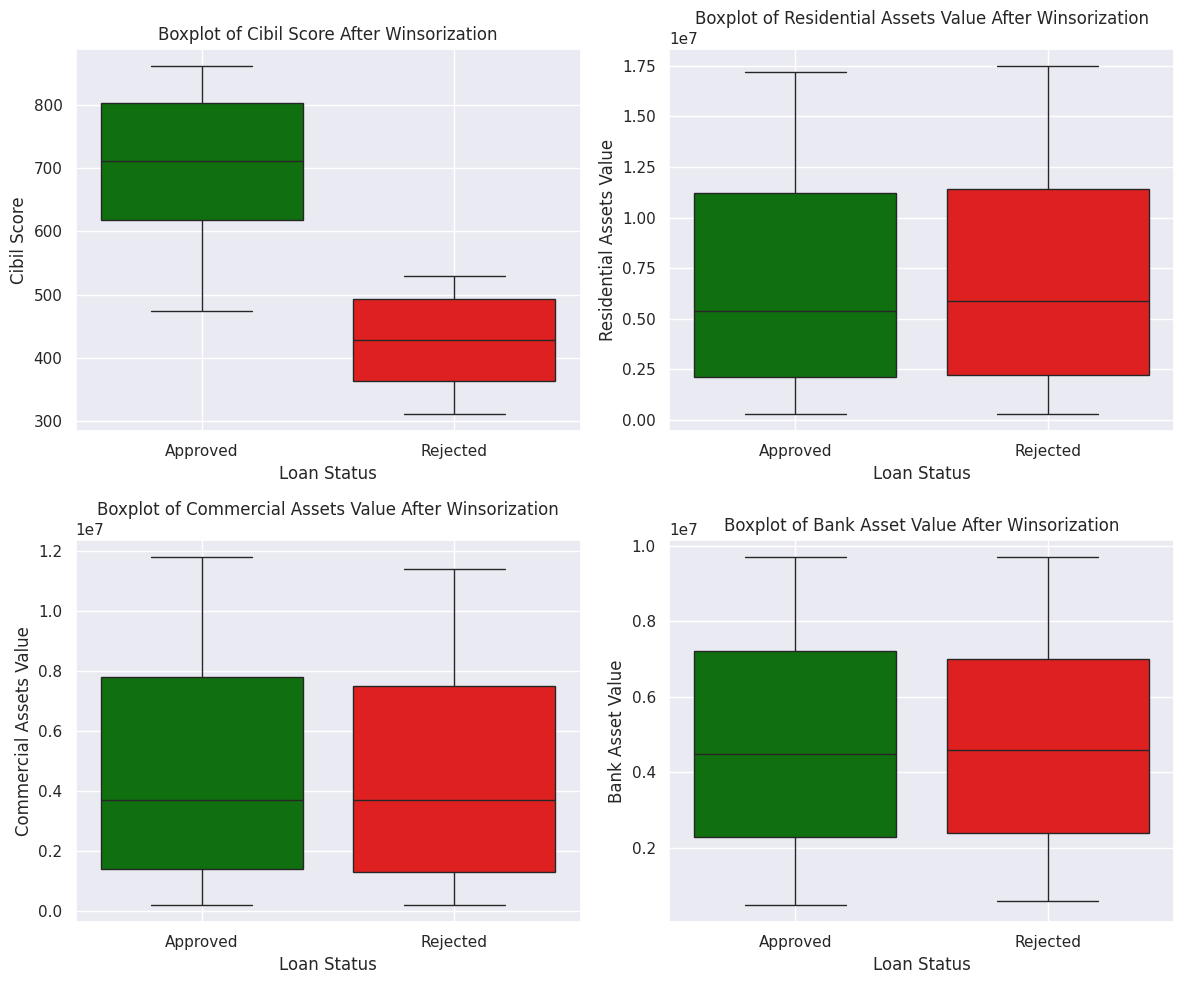

In [ ]:
# Import winsorize from scipy.stats.mstats
from scipy.stats.mstats import winsorize

# Define the columns to apply winsorization
columns_to_winsorize = ['cibil_score', 'residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

# Apply winsorization for each column separately for 'Approved' and 'Rejected' loan statuses
for column in columns_to_winsorize:
    approved_mask = df['loan_status'] == 'Approved'
    rejected_mask = df['loan_status'] == 'Rejected'

    # Apply Winsorization for 'Approved'
    df.loc[approved_mask, column] = winsorize(df.loc[approved_mask, column], limits=[0.05, 0.1], inclusive=(True, True))

    # Apply Winsorization for 'Rejected'
    df.loc[rejected_mask, column] = winsorize(df.loc[rejected_mask, column], limits=[0.05, 0.1], inclusive=(True, True))

# Create subplots for each boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot boxplots for each column
for i, column in enumerate(columns_to_winsorize):
    sns.boxplot(data=df, x='loan_status', y=column, palette={'Approved': 'green', 'Rejected': 'red'}, hue='loan_status', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column.replace("_", " ").title()} After Winsorization')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(column.replace("_", " ").title())
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


**Treat right-skewness using Box-Cox transformation:**

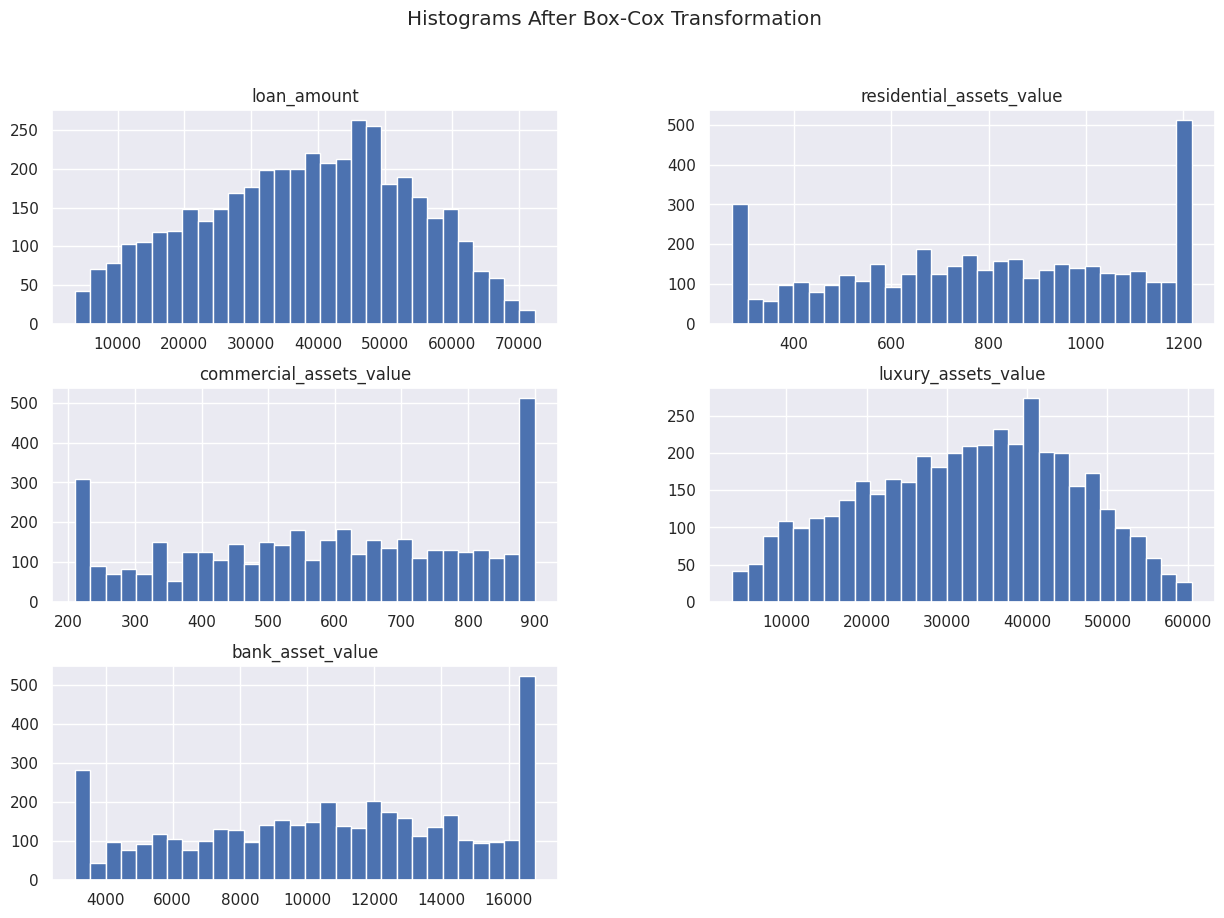

In [ ]:
import joblib
from scipy.stats import boxcox

# Apply Box-Cox transformation and save lambda values
lambdas = {}
columns_to_transform = ['loan_amount', 'residential_assets_value',
                        'commercial_assets_value', 'luxury_assets_value',
                        'bank_asset_value']

for column in columns_to_transform:
    transformed_data, lambda_ = boxcox(df[column] + 1)  # Adding 1 to avoid zero values
    df[column] = transformed_data  # Update the DataFrame with transformed data
    lambdas[column] = lambda_  # Save the lambda value

# Save the lambda values to a file
joblib.dump(lambdas, 'lambdas.joblib')

# Plot histograms after Box-Cox transformation
df[columns_to_transform].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms After Box-Cox Transformation')
plt.show()


**Add all the assets related columns and create a new column as 'total_assets':**

In [ ]:
# Create a new column 'total_assets' by summing the asset-related columns
df['total_assets'] = df['commercial_assets_value'] + df['residential_assets_value'] + df['bank_asset_value'] + df['luxury_assets_value']

# Drop the individual asset columns
columns_to_drop = ['commercial_assets_value', 'residential_assets_value', 'bank_asset_value', 'luxury_assets_value']
df.drop(columns=columns_to_drop, inplace=True)

**Encode the categorical features:**

In [ ]:
# Categorical encoding for education, employment_type, and self_employed

# Ordinal encoding for 'education'
education_order = {'8th': 0, '10th': 1, '12th': 2, 'Graduate': 3}
df['education'] = df['education'].replace(education_order)

# One-hot encoding for 'employment_type' and 'self_employed'
df = pd.get_dummies(df, columns=['employment_type', 'self_employed'], drop_first=True)

# Convert the boolean values in the encoded columns to integers (1 for True, 0 for False)
df['employment_type_Freelancer'] = df['employment_type_Freelancer'].astype(int)
df['employment_type_Salaried'] = df['employment_type_Salaried'].astype(int)
df['self_employed_Yes'] = df['self_employed_Yes'].astype(int)

**Encode the target variable:**

In [ ]:
# Encode Loan Status (Target) as 1 for Approved, 0 for Rejected
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})


In [ ]:
# Verify the changes
df.head(10)

no_of_dependents  education  income_annum  loan_amount  loan_term  \
0                 2          2       9600000        61069         12   
1                 0          2       4100000        35294          8   
2                 3          0       9100000        60818         20   
3                 3          0       8200000        62063          8   
4                 5          3       9800000        53658         20   
5                 0          3       4800000        37549         10   
6                 5          0       8700000        64867          4   
7                 2          2       5700000        40048         20   
8                 0          3        800000        12378         20   
9                 5          2       1100000        18650         10   

   cibil_score  loan_status  total_assets  employment_type_Freelancer  \
0          778            1         60097                           0   
1          417            0         34850                           0   
2          506            0         73144                           0   
3          467            0         60980                           0   
4          382            0         64264                           0   
5          319            0         45463                           0   
6          678            1         63354                           0   
7          382            0         43970                           0   
8          782            1         16648                           0   
9          388            0         20767                           0   

   employment_type_Salaried  self_employed_Yes  
0                         1                  0  
1                         1                  0  
2                         1                  0  
3                         1                  0  
4                         1                  0  
5                         1                  0  
6                         0                  1  
7                         0                  1  
8                         1                  0  
9                         1                  0

In [ ]:
# Shuffle the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shuffled DataFrame
df.head(20)


no_of_dependents  education  income_annum  loan_amount  loan_term  \
0                  5          1       5400000        47313         20   
1                  2          1       5900000        38393          8   
2                  3          0       9600000        47607         14   
3                  2          0       6200000        52566          8   
4                  3          3       5800000        38561         12   
5                  4          0       4700000        35822          8   
6                  4          1       3400000        37549         12   
7                  5          0       5100000        37888         14   
8                  3          2       3300000        28294         12   
9                  1          2       3000000        22865         16   
10                 5          2       8600000        59811          8   
11                 5          2       2900000        23558          6   
12                 4          0       3700000        33859         12   
13                 3          1        300000         5000          6   
14                 0          1       9100000        45227         14   
15                 2          1       5200000        40698          8   
16                 5          0       8200000        57504          4   
17                 2          2       5100000        42922          2   
18                 1          1        300000         8543          4   
19                 2          0       7600000        46723         12   

    cibil_score  loan_status  total_assets  employment_type_Freelancer  \
0           423            0         50885                           0   
1           599            1         52828                           0   
2           452            0         65040                           0   
3           605            1         60673                           0   
4           738            1         51659                           0   
5           678            1         41567                           0   
6           705            1         36561                           0   
7           527            0         52633                           0   
8           586            1         34484                           0   
9           518            0         40246                           0   
10          516            0         66879                           0   
11          719            1         30652                           0   
12          728            1         30855                           0   
13          386            0         11491                           0   
14          458            0         74069                           0   
15          658            1         41029                           0   
16          643            1         54148                           0   
17          504            1         48826                           0   
18          474            1         10772                           0   
19          463            0         53222                           0   

    employment_type_Salaried  self_employed_Yes  
0                          0                  1  
1                          0                  1  
2                          1                  0  
3                          0                  1  
4                          1                  0  
5                          1                  0  
6                          1                  0  
7                          1                  0  
8                          0                  1  
9                          0                  1  
10                         0                  1  
11                         1                  0  
12                         1                  0  
13                         1                  0  
14                         0                  1  
15                         1                  0  
16                         1                  0  
17             

**Separate the features and target and split the data into train and test sets:**

In [ ]:
# Separate the features and the target
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target


In [ ]:
# Split the data into training and testing sets (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Training set distribution:")
print(y_train.value_counts())

print("Testing set distribution:")
print(y_test.value_counts())


Training set distribution:
loan_status
1    2125
0    1290
Name: count, dtype: int64
Testing set distribution:
loan_status
1    531
0    323
Name: count, dtype: int64


**Handle class imbalance using SMOTE:**

In [ ]:
# Handle class imbalance using SMOTE (oversampling the minority class)
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [ ]:
# Display the shape of training data before and after SMOTE
print(f'Original X_train shape: {X_train.shape}, Original y_train distribution: {y_train.value_counts()}')
print(f'After SMOTE X_train shape: {X_train_smote.shape}, After SMOTE y_train distribution: {y_train_smote.value_counts()}')

Original X_train shape: (3415, 10), Original y_train distribution: loan_status
1    2125
0    1290
Name: count, dtype: int64
After SMOTE X_train shape: (4250, 10), After SMOTE y_train distribution: loan_status
1    2125
0    2125
Name: count, dtype: int64


**Feature Selection using Random Forest:**

                      Feature  Importance
5                 cibil_score    0.873414
4                   loan_term    0.045489
3                 loan_amount    0.018816
6                total_assets    0.014048
2                income_annum    0.013626
8    employment_type_Salaried    0.012765
9           self_employed_Yes    0.009545
0            no_of_dependents    0.005860
1                   education    0.005393
7  employment_type_Freelancer    0.001042


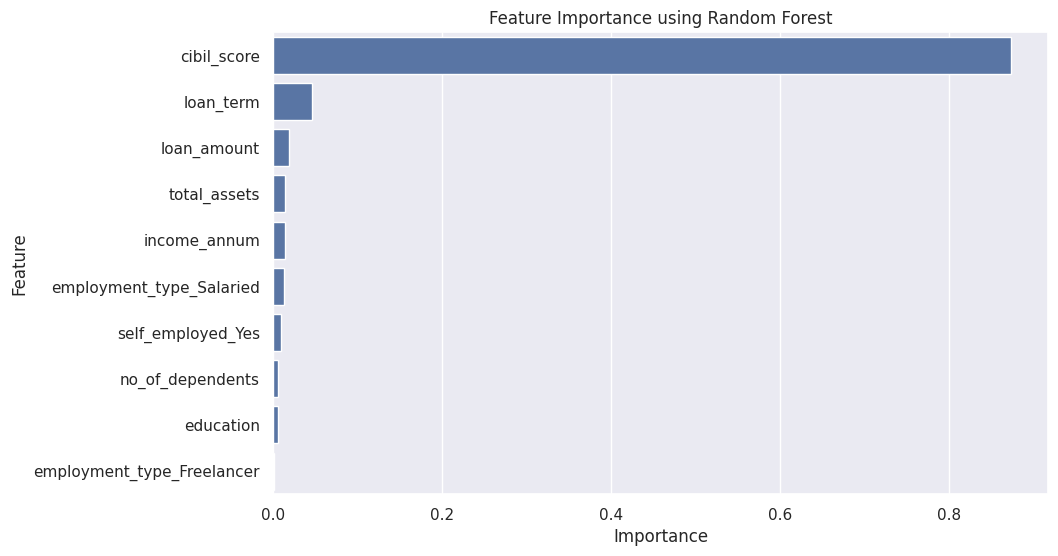

In [ ]:
# Random Forest for feature importance on the resampled data
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf.feature_importances_
features = X_train_smote.columns

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances with more decimal places
pd.set_option('display.float_format', '{:.6f}'.format)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()


We will consider the top 6 features for building our model i.e. cibil_score, loan_term, loan_amount, total_assets,income_anuum, employment_type_Salaried.

**Select the features and scale them:**

In [ ]:
from joblib import dump
# Select features for training
features = [
    'cibil_score',
    'loan_term',
    'loan_amount',
    'total_assets',
    'income_annum',
    'employment_type_Salaried'
]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote[features])
X_test_scaled = scaler.transform(X_test[features])

dump(scaler, 'scaler.joblib')


['scaler.joblib']

Now we will be testing 4 machine learning models for our classification problem. They are: Logistic Regression, Support Vector Machines, Random Forest and XGBoost.

**Determine the best parameters for the models:**

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train_scaled, y_train_smote)

# Store best parameters for Random Forest
best_rf_params = grid_rf.best_params_
print("Best parameters for Random Forest:", best_rf_params)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                         param_grid_xgb, cv=5, scoring='f1')

grid_xgb.fit(X_train_scaled, y_train_smote)

# Store best parameters for XGBoost
best_xgb_params = grid_xgb.best_params_
print("Best parameters for XGBoost:", best_xgb_params)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for XGBoost: {'colsample_bytree': 0.75, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.75}


In [ ]:
# Define the models with best parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, **best_rf_params),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', **best_xgb_params)
}

**Model training and Evaluation:**

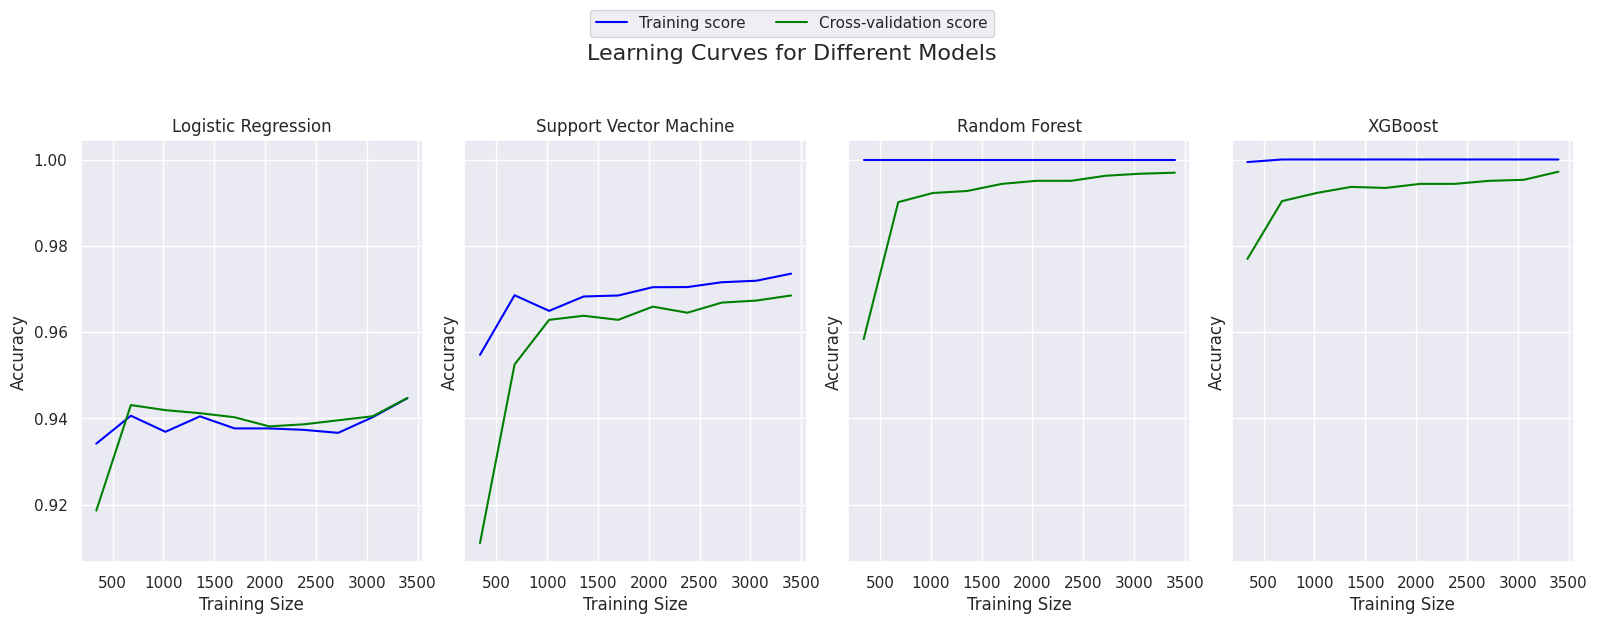

Accuracy  Precision   Recall  F1 Score
Logistic Regression     0.933255   0.959302 0.932203  0.945559
Support Vector Machine  0.974239   0.984762 0.973635  0.979167
Random Forest           0.997658   0.996248 1.000000  0.998120
XGBoost                 0.995316   0.998110 0.994350  0.996226

In [ ]:
from sklearn.model_selection import learning_curve


# Define a function to plot learning curves with subplots
def plot_learning_curves(models, X_train, y_train):
    # Create subplots for the number of models
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(16, 6), sharey=True)
    fig.suptitle('Learning Curves for Different Models', fontsize=16)

    # Loop through each model and its corresponding subplot
    for ax, (model_name, model) in zip(axes, models.items()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )

        # Calculate the mean for train and test scores
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        # Plot learning curve lines
        ax.plot(train_sizes, train_mean, label='Training score', color='blue')
        ax.plot(train_sizes, test_mean, label='Cross-validation score', color='green')

        # Set title and labels for each subplot
        ax.set_title(f'{model_name}')
        ax.set_xlabel('Training Size')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

    # Add a single legend for all subplots and adjust its position
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

    # Show the plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Initialize a dictionary to store model metrics
metrics = {}

# Train the models and evaluate their performance
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Plot learning curves for all models in a single figure with subplots
plot_learning_curves(models, X_train_scaled, y_train_smote)

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T
metrics_df


**Perform Cross-validation:**

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate each model
cv_metrics = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train_smote, cv=5, scoring='f1')
    cv_metrics[model_name] = {
        'F1 Score CV': cv_scores.mean(),
        'F1 Score Std': cv_scores.std()
    }

# Convert CV metrics to DataFrame for better visualization
cv_metrics_df = pd.DataFrame(cv_metrics).T
cv_metrics_df


F1 Score CV  F1 Score Std
Logistic Regression        0.944187      0.016772
Support Vector Machine     0.968289      0.009390
Random Forest              0.996952      0.002409
XGBoost                    0.997176      0.001202

**Observations and Conclusions:**
* **Logistic Regression:** It has the lowest performance metrics.
* **Support Vector Machine:** The  gap between training and cross-validation scores narrows as the training size incresases but the final accuracy is still lower than Random Forest and XGBoost. It performs very well but falls short of the ensemble models in accuracy and precision.
* **Random Forest:** The training score is extremely high ( near 100%) with a slight gap between training and cross-validation scores which suggests that the model is slightly overfitting but performs well overall.
* **XGBoost:** Consistent high accuracy for both training and cross-validation scores.

Furthermore,

**F1 Score CV:** This metric indicates the model's performance on unseen data. Higher values are better.

**F1 Score Std:** This metric indicates the consistency of the model's performance across different test sets. Lower values are better.

XGBoost has the highest F1 Score CV and the lowest F1 Score Std , indicating it performs exceptionally well and consistently. Hence, we select XGBoost as our final model.



**Save the best model (XGBoost):**

In [ ]:
import joblib

# Get the XGBoost model from your models dictionary
xgb_model = models['XGBoost']

# Save the model to a file
joblib.dump(xgb_model, 'xgboost_model.pkl')

print("XGBoost model saved as 'xgboost_model.pkl'")


XGBoost model saved as 'xgboost_model.pkl'


**Inference Code:**

In [ ]:
import pandas as pd
import joblib
import numpy as np

# Collecting input from the user
input_data = {
    'no_of_dependents': int(input("Enter number of dependents: ")),
    'education': input("Enter education level (8th/10th/12th/Graduate): "),
    'self_employed': input("Are you self-employed? (Yes/No): "),
    'employment_type': input("Enter employment type (Salaried/Business/Freelancer): "),
    'income_annum': float(input("Enter annual income: ")),
    'loan_amount': float(input("Enter loan amount: ")),
    'loan_term': float(input("Enter loan term: ")),
    'cibil_score': float(input("Enter CIBIL score: ")),
    'residential_assets_value': float(input("Enter residential assets value: ")),
    'commercial_assets_value': float(input("Enter commercial assets value: ")),
    'luxury_assets_value': float(input("Enter luxury assets value: ")),
    'bank_asset_value': float(input("Enter bank asset value: "))
}

# Creating a DataFrame for the input
df = pd.DataFrame([input_data])

# Load the lambda values for Box-Cox transformation
lambdas = joblib.load('lambdas.joblib')

# Function to apply Box-Cox transformation
def boxcox_transform(value, lambda_value):
    return (value ** lambda_value - 1) / lambda_value if lambda_value != 0 else np.log(value)

# Apply Box-Cox transformation to relevant features
df['loan_amount'] = boxcox_transform(df['loan_amount'] + 1, lambdas['loan_amount'])
df['residential_assets_value'] = boxcox_transform(df['residential_assets_value'] + 1, lambdas['residential_assets_value'])
df['commercial_assets_value'] = boxcox_transform(df['commercial_assets_value'] + 1, lambdas['commercial_assets_value'])
df['luxury_assets_value'] = boxcox_transform(df['luxury_assets_value'] + 1, lambdas['luxury_assets_value'])
df['bank_asset_value'] = boxcox_transform(df['bank_asset_value'] + 1, lambdas['bank_asset_value'])

# Create 'total_assets' feature
df['total_assets'] = (
    df['residential_assets_value'] +
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)


# Manually create 'employment_type_Salaried' column
df['employment_type_Salaried'] = df['employment_type'].apply(lambda x: 1 if x == 'Salaried' else 0)

# Drop irrelevant features before scaling
df = df[['cibil_score', 'loan_term', 'loan_amount', 'total_assets', 'income_annum', 'employment_type_Salaried']]

# Scaling the selected features
scaler = joblib.load('scaler.joblib')
scaled_features = scaler.transform(df)

# Load the XGBoost model
xgb_model = joblib.load('xgboost_model.pkl')

# Predict the loan status
prediction = xgb_model.predict(scaled_features)

# Output the result
if prediction == 1:
    print("Loan Status: Approved")
else:
    print("Loan Status: Rejected")


Enter number of dependents: 2
Enter education level (8th/10th/12th/Graduate): 10th
Are you self-employed? (Yes/No): No
Enter employment type (Salaried/Business/Freelancer): Salaried
Enter annual income: 6000000
Enter loan amount: 18000000
Enter loan term: 6
Enter CIBIL score: 720
Enter residential assets value: 3000000
Enter commercial assets value: 4000000
Enter luxury assets value: 15000000
Enter bank asset value: 5000000
Loan Status: Approved
